<a href="https://colab.research.google.com/github/meliusa/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UTS**

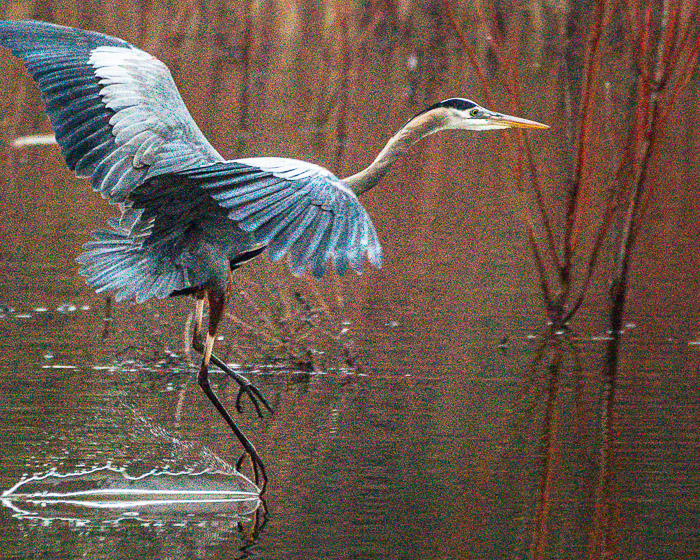

In [68]:
import cv2

# Membaca gambar dengan mode warna
# foto1 = cv.imread('/content/drive/MyDrive/Gambar untuk UTS/Gambar1.jpg', cv2.IMREAD_COLOR)
foto2 = cv.imread('/content/drive/MyDrive/Gambar untuk UTS/Gambar2.jpg', cv2.IMREAD_COLOR)

# Mengubah ukuran gambar menjadi setengah dari ukuran aslinya
# resized_img1 = cv2.resize(foto1, (0,0), fx=0.5, fy=0.5)
# resized_img2 = cv2.resize(foto2, (0,0), fx=0.5, fy=0.5)

# Menampilkan gambar dengan ukuran yang sesuai
# cv2_imshow(resized_img1)
# cv2_imshow(resized_img2)
cv2_imshow(foto2)

cv2.resize(img, (0,0), fx=0.5, fy=0.5) menghasilkan gambar yang diresize menjadi setengah dari ukuran gambar aslinya, dengan parameter (0,0) digunakan untuk menentukan ukuran gambar baru secara otomatis, berdasarkan faktor pengubah fx dan fy yang digunakan untuk mengurangi ukuran gambar.

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Baris kode "from google.colab import drive" dan "drive.mount('/content/drive')" digunakan untuk menghubungkan Google Colab dengan Google Drive, layanan penyimpanan cloud dari Google yang memungkinkan pengguna untuk menyimpan dan berbagi file secara online. Dengan menghubungkan Google Colab dengan Google Drive, kita dapat dengan mudah mengakses, mengedit, dan menyimpan file yang tersimpan di Google Drive langsung dari Google Colab. Hal ini memudahkan pengelolaan file dan kolaborasi antar tim, sehingga perubahan yang dilakukan oleh satu anggota tim akan langsung terlihat oleh anggota tim lainnya.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

* import numpy as np digunakan untuk mengimpor library NumPy, yang digunakan untuk operasi numerik pada array, matrix, dan vektor dalam Python.

* import matplotlib.pyplot as plt digunakan untuk mengimpor library Matplotlib, yang digunakan untuk membuat plot dan visualisasi data dalam Python.

* import cv2 as cv digunakan untuk mengimpor library OpenCV, yang digunakan untuk melakukan pengolahan gambar dan pengenalan pola pada gambar.

* import math digunakan untuk mengimpor library math, yang menyediakan fungsi matematika yang umum digunakan dalam Python.

* from google.colab.patches import cv2_imshow digunakan untuk mengimpor cv2_imshow, fungsi khusus Google Colab untuk menampilkan gambar dalam notebook.

* from PIL import Image as im digunakan untuk mengimpor library Python Imaging Library (PIL), yang digunakan untuk membaca, menulis, dan memanipulasi berbagai format file gambar. PIL sering digunakan untuk mengubah format gambar dan mengkonversi gambar ke format yang berbeda.

In [51]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Add padding to the image
    if padding > 0:
        image = np.pad(image, padding, mode='constant')
    
    # Compute the output shape
    input_h, input_w = image.shape
    kernel_h, kernel_w = kernel.shape
    output_h = (input_h - kernel_h) // stride + 1
    output_w = (input_w - kernel_w) // stride + 1
    
    # Initialize the output image
    output = np.zeros((output_h, output_w))
    
    # Perform convolution
    for i in range(output_h):
        for j in range(output_w):
            output[i, j] = np.sum(image[i*stride:i*stride+kernel_h, j*stride:j*stride+kernel_w] * kernel)
    
    return output

def convolution2d(image, kernel, stride=1, padding=0): adalah fungsi Python untuk melakukan konvolusi 2D pada gambar.

* image: Gambar input yang akan dikonvolusi. Direpresentasikan sebagai array NumPy.

* kernel: Kernel atau filter konvolusi yang akan diterapkan pada gambar input. Direpresentasikan sebagai array NumPy.

* stride: Jarak antar kernel saat bergerak pada gambar input.

* padding: Jumlah padding yang akan ditambahkan pada gambar input sebelum dilakukan konvolusi.

Fungsi ini menggeser kernel pada gambar input dan pada setiap posisi kernel, menghitung nilai konvolusi antara kernel dan area gambar yang ditutupi oleh kernel. Hasilnya disimpan dalam array output yang dikembalikan oleh fungsi.

Konvolusi sangat penting dalam pengolahan citra untuk melakukan operasi seperti deteksi tepi, penghalusan, dan pengenalan pola.

In [69]:
img = cv.imread('/content/drive/MyDrive/Gambar untuk UTS/Gambar2.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv.imread('/content/drive/MyDrive/Gambar untuk UTS/Gambar2.jpg') digunakan untuk membaca gambar JPEG, sedangkan cv.cvtColor(img, cv.COLOR_BGR2GRAY) digunakan untuk mengubah gambar menjadi grayscale.

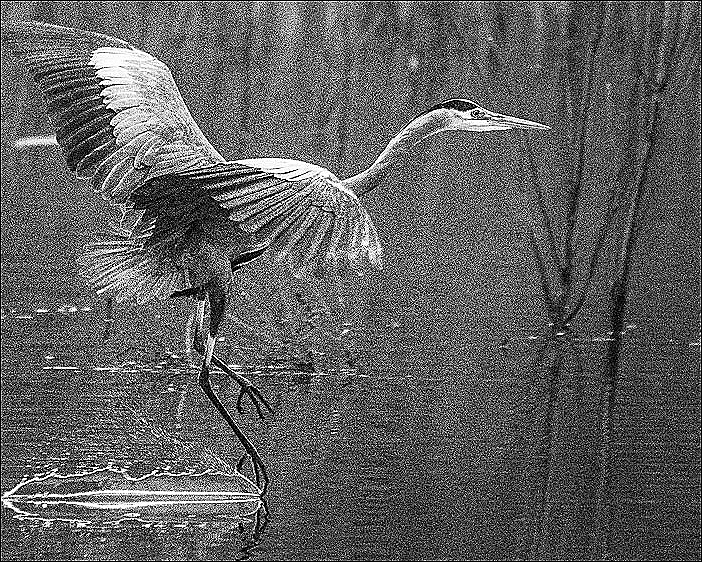

In [70]:
# Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

kernel_sharpen adalah sebuah kernel konvolusi 3x3 yang digunakan untuk melakukan operasi sharpen pada gambar grayscale hasil dari img_gray. Hasil konvolusi akan ditampilkan dengan cv2_imshow(). Operasi sharpen akan meningkatkan detail dan kontras pada gambar dengan meningkatkan perbedaan intensitas piksel di sekitar tepi objek pada gambar. Kernel ini memiliki nilai positif pada bagian tengah (5) yang menunjukkan bahwa piksel di pusat kernel akan diperkuat, sedangkan nilai negatif pada bagian tepi menunjukkan bahwa piksel di tepi objek pada gambar akan dilemahkan.

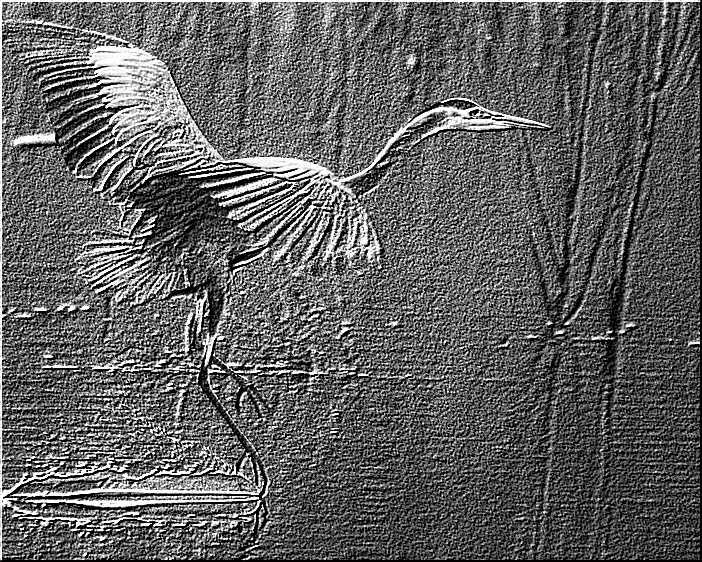

In [54]:
# Embross
kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])
cv2_imshow(convolution2d(img_gray,kernel_emboss,1,2))

kernel_emboss adalah sebuah kernel konvolusi 3x3 yang digunakan untuk melakukan operasi emboss pada gambar. Kernel ini akan diaplikasikan pada gambar grayscale yang dihasilkan dari img_gray dengan menggunakan fungsi convolution2d(). Hasil dari operasi konvolusi tersebut kemudian ditampilkan dengan menggunakan cv2_imshow(). Operasi emboss pada dasarnya membuat objek pada gambar tampak lebih tiga dimensi dengan memberikan efek bayangan atau relief. Pada kernel kernel_emboss, nilai negatif pada bagian kiri atas menunjukkan bahwa piksel di bagian tersebut akan diperlemah, sementara nilai positif pada bagian kanan bawah menunjukkan bahwa piksel di bagian tersebut akan diperkuat.

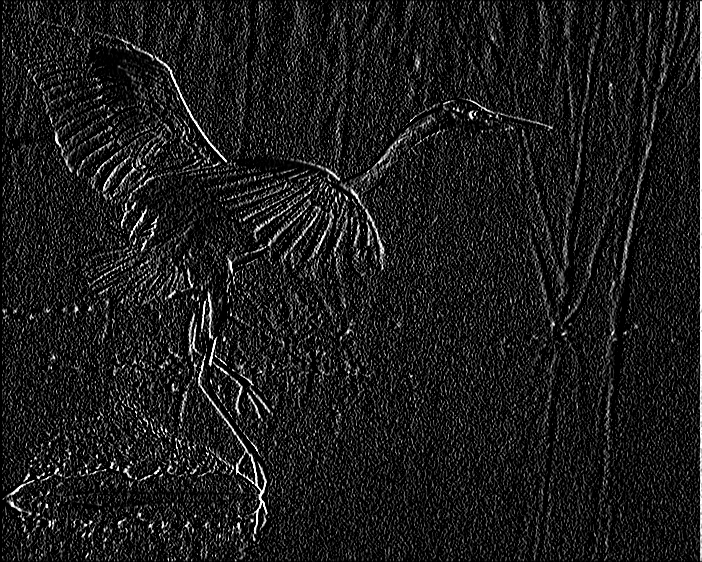

In [55]:
# Sobel
kernel_sobel = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])
cv2_imshow(convolution2d(img_gray,kernel_sobel,1,2))

kernel_sobel adalah sebuah kernel konvolusi 3x3 yang digunakan untuk melakukan operasi deteksi tepi pada gambar dengan metode Sobel. Kernel ini diaplikasikan pada gambar grayscale hasil dari img_gray dengan menggunakan fungsi convolution2d(). Hasil dari operasi konvolusi tersebut kemudian ditampilkan dengan cv2_imshow().

Metode Sobel adalah teknik deteksi tepi pada gambar yang menghasilkan tepi tajam dan terdefinisi dengan baik. Kernel Sobel terdiri dari 2 kernel yaitu kernel sobel_x dan sobel_y. Kernel sobel_x digunakan untuk mendeteksi tepi vertikal, sedangkan kernel sobel_y digunakan untuk mendeteksi tepi horizontal.

Pada kernel_sobel, nilai 1 dan 2 pada bagian atas menunjukkan bahwa piksel pada bagian tersebut akan diperkuat secara vertikal, sedangkan nilai -1 dan -2 pada bagian bawah menunjukkan bahwa piksel pada bagian tersebut akan diperlemah secara vertikal. Dalam hal ini, kernel_sobel digunakan untuk mendeteksi tepi vertikal pada gambar.

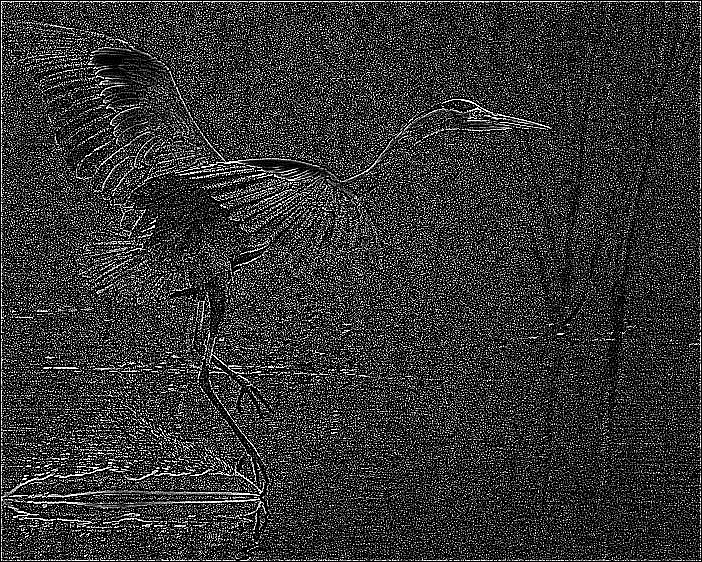

In [56]:
# Canny
kernel_canny = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray,kernel_canny,1,2))
     

Coding kernel_canny merupakan kernel konvolusi dengan matriks 3x3 yang digunakan untuk mengaplikasikan metode deteksi tepi Canny pada citra grayscale. Kernel ini memiliki nilai-nilai tertentu pada setiap elemennya, yaitu:

```
[[-1, -1, -1],
 [-1,  8, -1],
 [-1, -1, -1]]
```
Proses ini dilakukan dengan melakukan konvolusi antara kernel ini dengan citra grayscale menggunakan fungsi convolution2d yang kemudian ditampilkan hasilnya menggunakan cv2_imshow(). Filter ini digunakan untuk menghitung gradien citra pada setiap piksel dan mengevaluasi apakah gradiennya merupakan tepi.




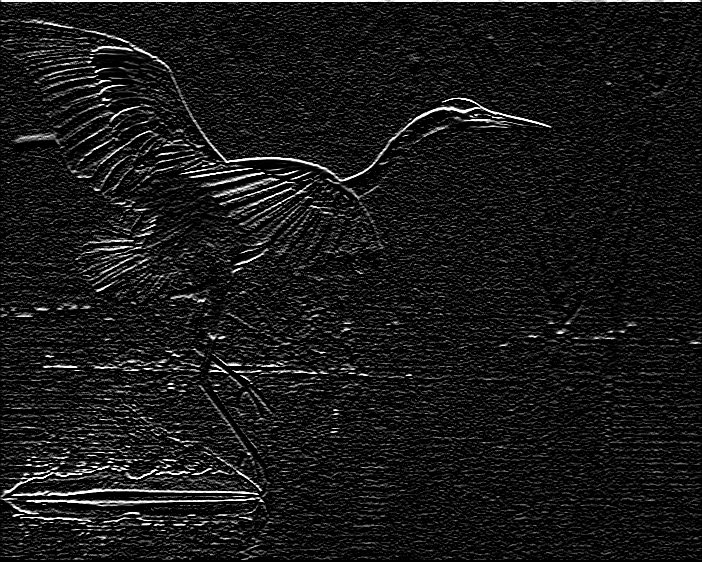

In [57]:
# Prewitt

prewitt_sharpen = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, prewitt_sharpen,1,2))

* Filter Prewitt adalah filter untuk deteksi tepi pada citra.
* Kernel prewitt_sharpen adalah kernel Prewitt berukuran 3x3 yang digunakan untuk menghasilkan citra grayscale baru yang menunjukkan perubahan intensitas yang signifikan pada citra asli.
* Proses convolusi dilakukan pada citra grayscale img_gray dengan menggunakan fungsi convolution2d dan hasilnya akan ditampilkan dengan menggunakan cv2_imshow.
* Filter Prewitt menghasilkan citra yang menunjukkan tepi vertikal dan horizontal pada citra.

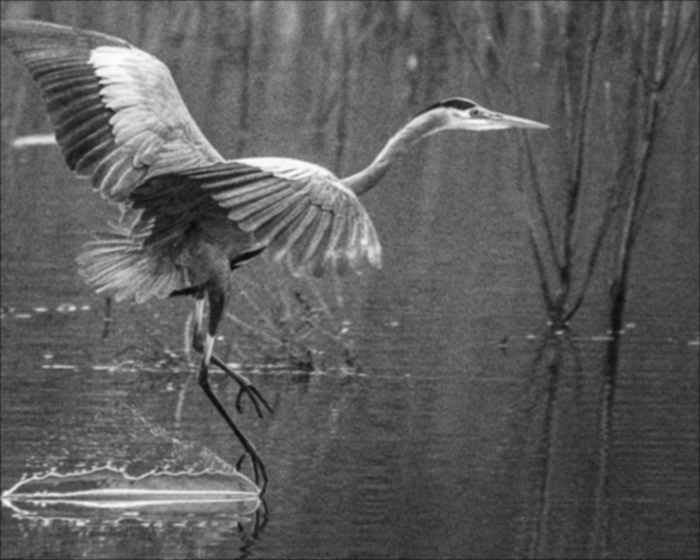

In [58]:
# 5x5 Gussian Blur

gaussian_sharpen = np.array([[1/256, 4/256, 6/256, 4/256, 1/256],
                           [4/256, 16/256, 24/256, 16/256, 4/256],
                           [6/256, 24/256, 36/256, 24/256, 6/256],
                           [4/256, 16/256, 24/256, 16/256, 4/256],
                           [1/256, 4/256, 6/256, 4/256, 1/256]])
cv2_imshow(convolution2d(img_gray, gaussian_sharpen,1,2))

Ini adalah implementasi filter Gaussian Blur dengan kernel 5x5. Filter ini digunakan untuk menghaluskan gambar atau mengurangi noise pada gambar. Setiap elemen matriks kernel memiliki bobot yang berbeda, yang dihitung menggunakan distribusi Gaussian. Tujuan dari penggunaan filter Gaussian Blur adalah untuk menghasilkan gambar yang lebih halus dan tidak berkabut.

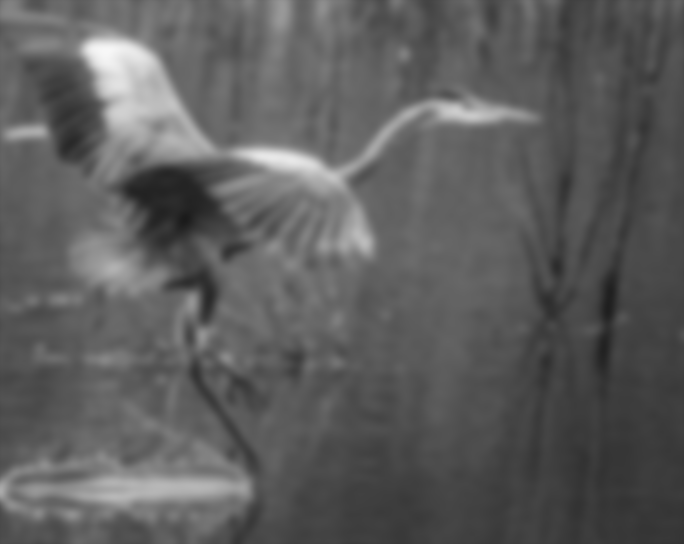

In [59]:
# Gussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))

* Variabel kernel_size dan sigma digunakan untuk menentukan ukuran kernel dan nilai sigma pada Gaussian filter.
* Fungsi cv2.getGaussianKernel() digunakan untuk menghasilkan kernel Gaussian dengan ukuran dan sigma yang telah ditentukan.
* kernel 1 dimensi yang dihasilkan kemudian dikonvolusikan dengan dirinya sendiri menggunakan dot product sehingga menghasilkan kernel 2 dimensi yang dapat digunakan pada citra grayscale.
* Citra grayscale dihaluskan menggunakan kernel Gaussian yang telah dihasilkan dengan memanggil fungsi convolution2d().
* Hasil dari Gaussian Blur ditampilkan menggunakan cv2_imshow().

**KESIMPULAN**

Filter adalah teknik dalam pengolahan citra dan visi komputer untuk memproses gambar dengan tujuan tertentu, seperti menghilangkan noise, meningkatkan ketajaman, atau mendeteksi tepi. Beberapa jenis filter yang umum digunakan antara lain filter Gaussian Blur, Sobel, Prewitt, dan Canny.

Proses penggunaan filter pada gambar dilakukan dengan mengaplikasikan kernel konvolusi pada citra. Kernel konvolusi berisi bobot atau weight yang akan diterapkan pada piksel pada gambar. Fungsi convolution2d() pada library OpenCV digunakan untuk melakukan konvolusi.

Ukuran kernel dan nilai sigma pada filter mempengaruhi hasil pengolahan citra dengan filter. Semakin besar ukuran kernel dan nilai sigma, semakin banyak informasi citra yang dihaluskan.

Hasil pengolahan citra dengan filter ditampilkan menggunakan fungsi cv2_imshow() khusus dari Google Colab untuk menampilkan gambar.